# CODING CHALLENGE – DATA SCIENTIST

## Aufgabe

Unter https://www.openml.org/d/41214 und https://www.openml.org/d/41215 finden Sie zwei Daten-
sätze eines französischen Automobilversicherers. Diese beinhalten Risikomerkmale und Schaden-
informationen zu Kraftfahrt-Haftpflicht-Versicherungsverträgen (eine Datensatzbeschreibung finden Sie
am Ende dieses Textes). 

Aufgabe: Modellierung der zu erwartenden Schadenhöhe pro Versicherungsnehmer und Jahr 
anhand der Risikomerkmale der Kunden. Dieser Wert ist Basis für die Berechnung eines 
fairen Versicherungsbeitrags.

### Meine Annahme: Die Features 'ClaimAmount', 'Exposure' und 'ClaimNb' dürfen nicht verwendet werden, um einen fairen Versicherungsbeitrag für einen Kunden zu berechnen. Werden diese Features doch verwendet, führen sie zu unrealistisch guten Ergebnissen, die in Realität mit den verfügbaren Daten nicht erzielt werden können.

In meinem ersten Versuch wollte ich mit einer Regression möglichst genaue Vorhersage treffen, allerdings waren die Ergebnisse so schlecht, dass ich in einem zweiten Versuch eine Klassifikation im Notebook "Coding_Challenge_HUK-Coburg_Classification.ipynb" vorgenommen habe.

In [1]:
!pip install arff

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import arff
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_freq = arff.load('freMTPL2freq.arff')
df_freq = pd.DataFrame(data_freq, columns=["IDpol", "ClaimNb", "Exposure", "Area", "VehPower",
"VehAge","DrivAge", "BonusMalus", "VehBrand", "VehGas", "Density", "Region"])

data_sev = arff.load('freMTPL2sev.arff')
df_sev = pd.DataFrame(data_sev, columns=["IDpol", "ClaimAmount"])

## Erstellung des Labels:

In [4]:
# Merge der beiden Datensätze basierend auf der IDpol
data = pd.merge(df_freq, df_sev, on='IDpol')

# Feature Engineering: Erstellen der abhängigen Variable (Schadenhöhe pro Jahr)
data['ClaimAmountPerYear'] = data['ClaimAmount'] / data['Exposure']

In [5]:
data.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,ClaimAmount,ClaimAmountPerYear
count,2.644400e+04,26444.000000,26444.000000,26444.000000,26444.000000,26444.000000,26444.000000,26444.000000,2.644400e+04,2.644400e+04
mean,2.280004e+06,1.139427,0.691791,6.464415,7.355090,45.121502,65.231054,2015.302942,2.265513e+03,9.826644e+03
std,1.583004e+06,0.617563,0.313213,2.017260,5.165475,14.694677,20.143480,4162.639153,2.937103e+04,1.854732e+05
min,1.390000e+02,1.000000,0.002740,4.000000,0.000000,18.000000,50.000000,2.000000,1.000000e+00,1.000000e+00
25%,1.086381e+06,1.000000,0.450000,5.000000,3.000000,34.000000,50.000000,115.000000,6.859925e+02,1.128000e+03
50%,2.133756e+06,1.000000,0.760000,6.000000,7.000000,45.000000,55.000000,524.500000,1.172000e+03,1.433333e+03
75%,3.183953e+06,1.000000,1.000000,7.000000,11.000000,54.000000,76.000000,2252.000000,1.212385e+03,3.171083e+03
max,6.113971e+06,16.000000,2.000000,15.000000,99.000000,99.000000,228.000000,27000.000000,4.075401e+06,1.852455e+07


## Data Exploration

In [6]:
data

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount,ClaimAmountPerYear
0,139.0,1.0,0.75,'F',7.0,1.0,61.0,50.0,'B12',Regular,27000.0,'R11',303.00,404.000000
1,190.0,1.0,0.14,'B',12.0,5.0,50.0,60.0,'B12',Diesel,56.0,'R25',1981.84,14156.000000
2,414.0,1.0,0.14,'E',4.0,0.0,36.0,85.0,'B12',Regular,4792.0,'R11',1456.55,10403.928571
3,424.0,2.0,0.62,'F',10.0,0.0,51.0,100.0,'B12',Regular,27000.0,'R11',989.64,1596.193548
4,424.0,2.0,0.62,'F',10.0,0.0,51.0,100.0,'B12',Regular,27000.0,'R11',9844.36,15878.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26439,6113793.0,1.0,0.14,'C',7.0,2.0,51.0,50.0,'B12',Diesel,178.0,'R72',1769.88,12642.000000
26440,6113817.0,1.0,0.17,'D',4.0,0.0,35.0,51.0,'B12',Regular,1719.0,'R82',1288.28,7578.117647
26441,6113834.0,2.0,0.17,'C',15.0,3.0,36.0,50.0,'B12',Regular,181.0,'R54',10290.00,60529.411765
26442,6113834.0,2.0,0.17,'C',15.0,3.0,36.0,50.0,'B12',Regular,181.0,'R54',1940.40,11414.117647


In [7]:
data['ClaimAmountPerYear'].median()

1433.3333333333335

## Untersuche die Zielvariable

array([[<Axes: title={'center': 'ClaimAmountPerYear'}>]], dtype=object)

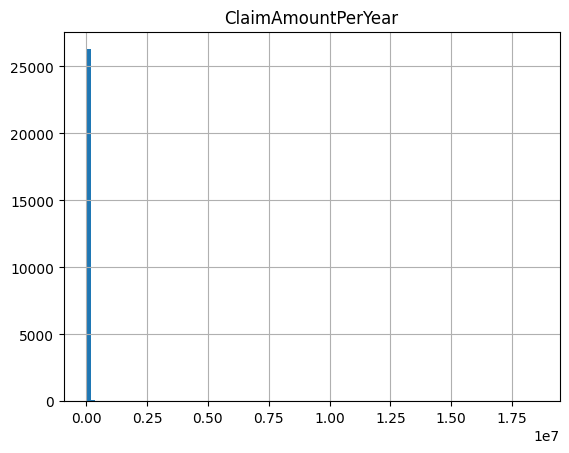

In [8]:
data.hist(column=["ClaimAmountPerYear"], bins=100)

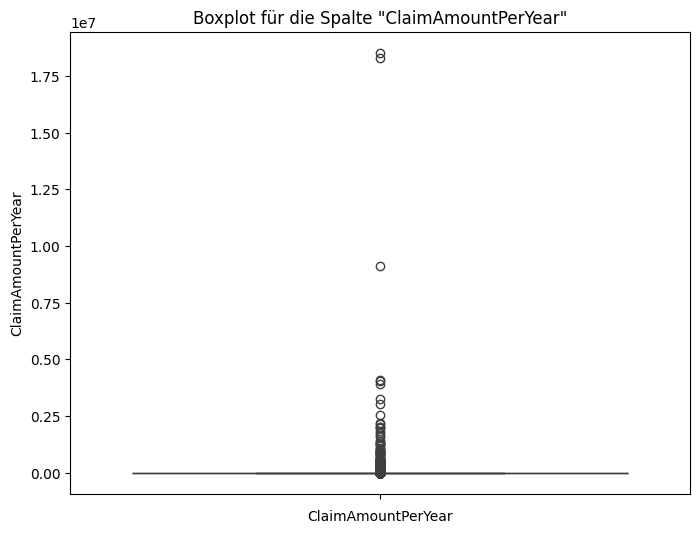

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['ClaimAmountPerYear'])
plt.title('Boxplot für die Spalte "ClaimAmountPerYear"')
plt.xlabel('ClaimAmountPerYear')
plt.show()

In [10]:
# Ausreißer zählen
q1 = data['ClaimAmountPerYear'].quantile(0.25)
q3 = data['ClaimAmountPerYear'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = data[(data['ClaimAmountPerYear'] < lower_bound) | (data['ClaimAmountPerYear'] > upper_bound)]
num_outliers = outliers.shape[0]

print("Anzahl der Ausreißer:", num_outliers)


Anzahl der Ausreißer: 3556


In [11]:
total_value = len(data) 
part_value = num_outliers  
percentage = (part_value / total_value) * 100
print(str(percentage) + "% sind Ausreißer in der Zielvariablen mit einem IQR von 3.")

13.447284828316441% sind Ausreißer in der Zielvariablen mit einem IQR von 3.


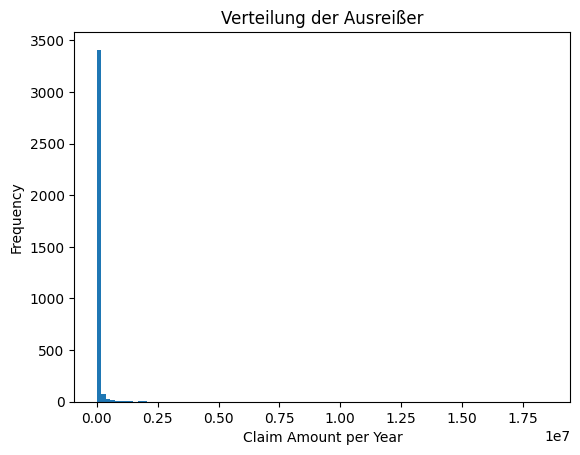

Median der Ausreißer: 13264.412037037036


In [12]:
# Verteilung der Ausreißer anzeigen (Histogramm)
plt.hist(outliers['ClaimAmountPerYear'], bins=100)
plt.xlabel('Claim Amount per Year')
plt.ylabel('Frequency')
plt.title('Verteilung der Ausreißer')
plt.show()

# Median der Ausreißer bestimmen
median_outliers = outliers['ClaimAmountPerYear'].median()
print("Median der Ausreißer:", median_outliers)


In [13]:
# Ausreißer auf den Median aller Ausreißer setzen
#data.loc[(data['ClaimAmountPerYear'] < lower_bound) | (data['ClaimAmountPerYear'] > upper_bound), 'ClaimAmountPerYear'] = median_outliers


In [14]:
# Bestimmen der Werte, die nicht als Ausreißer gelten
#non_outliers = data[(data['ClaimAmountPerYear'] >= lower_bound) & (data['ClaimAmountPerYear'] <= upper_bound)]

# Höchsten Wert unter den nicht als Ausreißer geltenden Werten bestimmen
#highest_non_outlier = non_outliers['ClaimAmountPerYear'].max()

# Ausreißer auf den höchsten nicht als Ausreißer geltenden Wert setzen
#data.loc[(data['ClaimAmountPerYear'] < lower_bound) | (data['ClaimAmountPerYear'] > upper_bound), 'ClaimAmountPerYear'] = highest_non_outlier

# Überprüfen, ob die Werte erfolgreich geändert wurden
#print("Anzahl der Ausreißer nach Anpassung:", data[(data['ClaimAmountPerYear'] < lower_bound) | (data['ClaimAmountPerYear'] > upper_bound)].shape[0])


In [17]:
non_outliers = data[(data['ClaimAmountPerYear'] >= lower_bound) & (data['ClaimAmountPerYear'] <= upper_bound)]

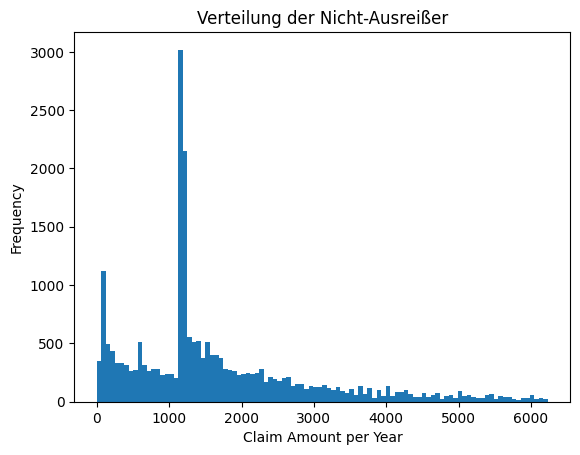

Median der Nicht-Ausreißer: 1220.8333333333335


In [18]:
# Verteilung der Ausreißer anzeigen (Histogramm)
plt.hist(non_outliers['ClaimAmountPerYear'], bins=100)
plt.xlabel('Claim Amount per Year')
plt.ylabel('Frequency')
plt.title('Verteilung der Nicht-Ausreißer')
plt.show()

# Median der Ausreißer bestimmen
median_outliers = non_outliers['ClaimAmountPerYear'].median()
print("Median der Nicht-Ausreißer:", median_outliers)


In [19]:
# Remove outliers from the original DataFrame
data_without_outliers = data.drop(outliers.index)
data = data_without_outliers

## Untersuche unabhängige Variablen

array([[<Axes: title={'center': 'BonusMalus'}>]], dtype=object)

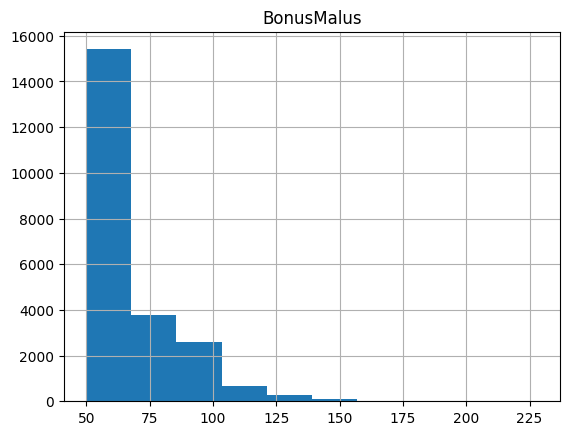

In [20]:
data.hist(column=["BonusMalus"])

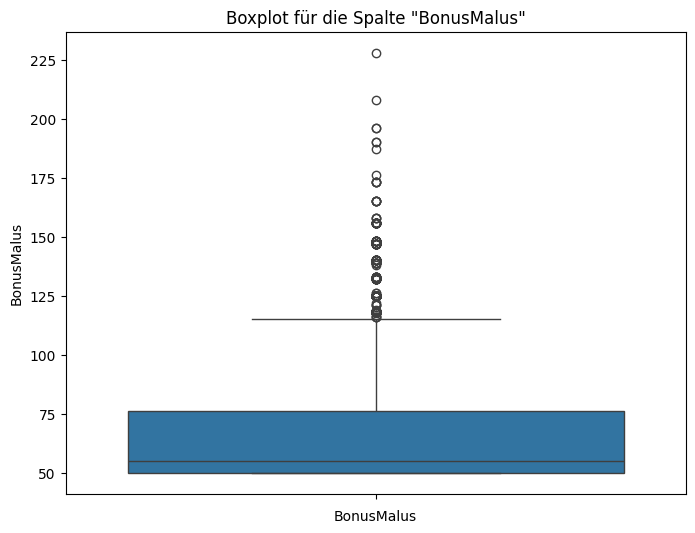

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['BonusMalus'])
plt.title('Boxplot für die Spalte "BonusMalus"')
plt.xlabel('BonusMalus')
plt.show()

<Axes: xlabel='ClaimNb'>

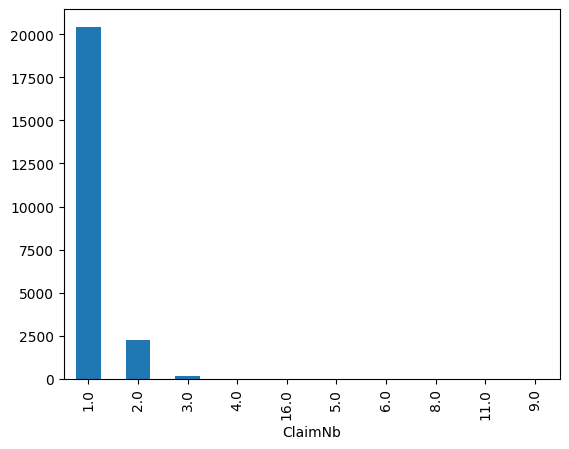

In [22]:
data['ClaimNb'].value_counts().plot(kind='bar')

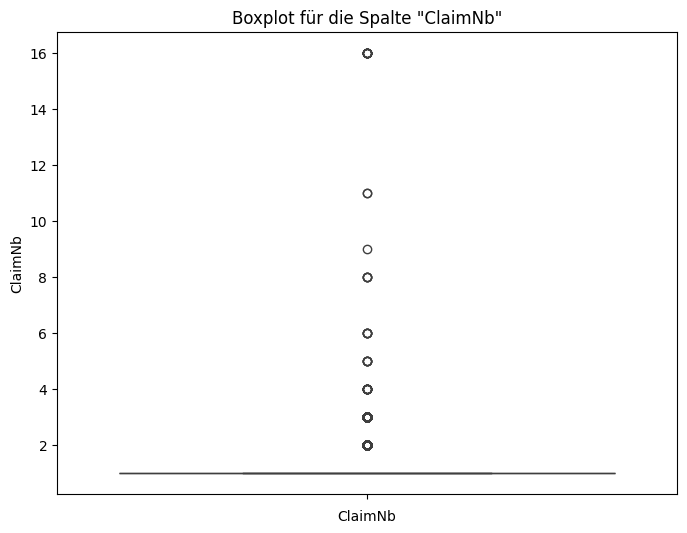

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['ClaimNb'])
plt.title('Boxplot für die Spalte "ClaimNb"')
plt.xlabel('ClaimNb')
plt.show()


array([[<Axes: title={'center': 'Exposure'}>]], dtype=object)

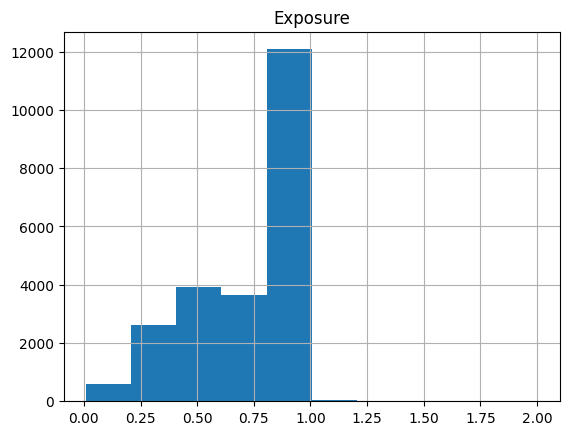

In [24]:
data.hist(column=["Exposure"])

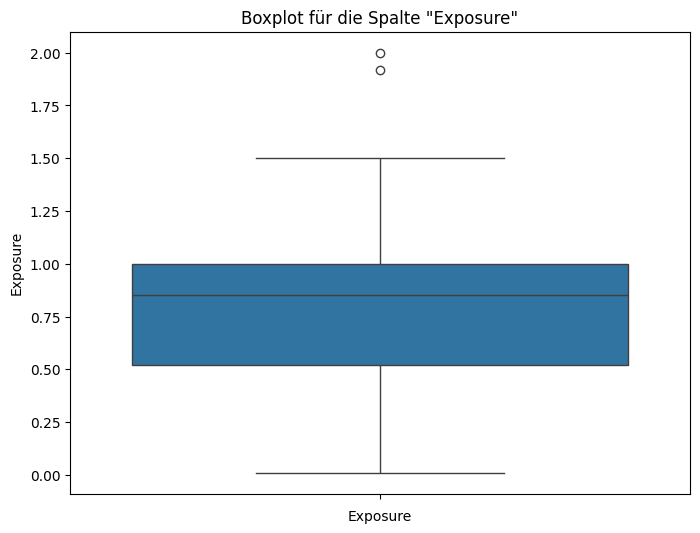

In [28]:
# Untersuche, ob es Ausreißer für die Länge des Versicherungszeitraums (in Jahren) gibt:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['Exposure'])
plt.title('Boxplot für die Spalte "Exposure"')
plt.xlabel('Exposure')
plt.show()

<Axes: xlabel='Area'>

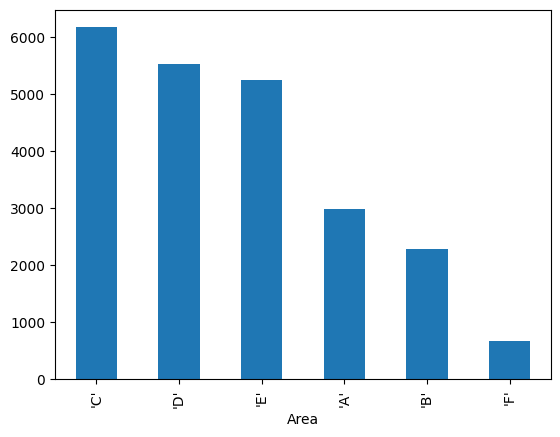

In [29]:
data['Area'].value_counts().plot(kind='bar')

<Axes: xlabel='VehBrand'>

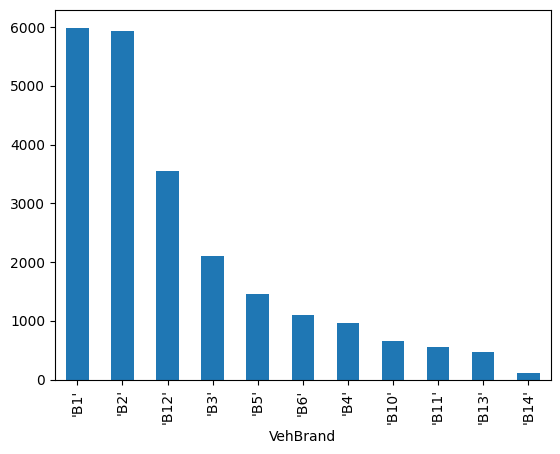

In [30]:
data['VehBrand'].value_counts().plot(kind='bar')

<Axes: xlabel='VehPower'>

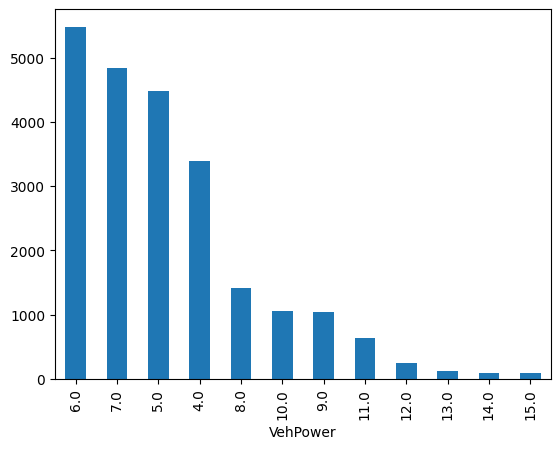

In [31]:
data['VehPower'].value_counts().plot(kind='bar')

array([[<Axes: title={'center': 'VehAge'}>]], dtype=object)

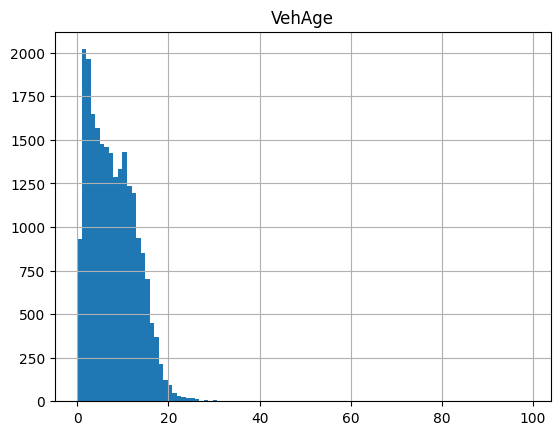

In [32]:
data.hist(column=["VehAge"], bins=100)

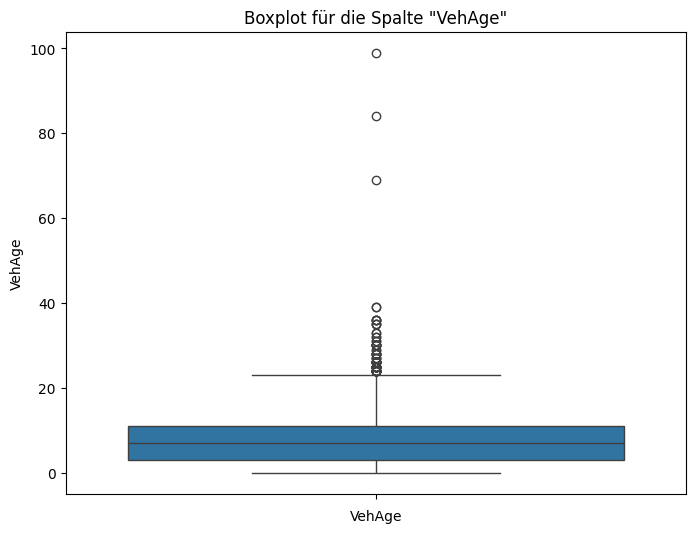

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['VehAge'])
plt.title('Boxplot für die Spalte "VehAge"')
plt.xlabel('VehAge')
plt.show()


array([[<Axes: title={'center': 'DrivAge'}>]], dtype=object)

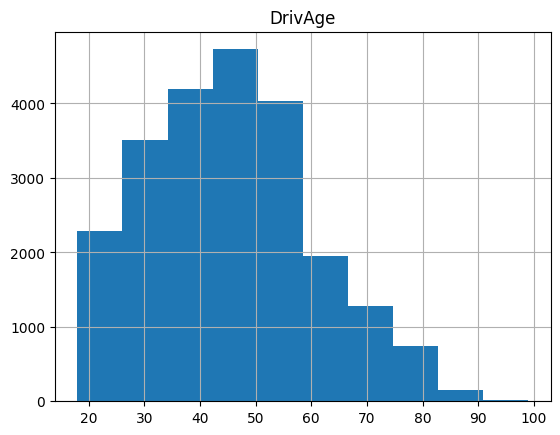

In [34]:
data.hist(column=["DrivAge"]) #, bins=50)

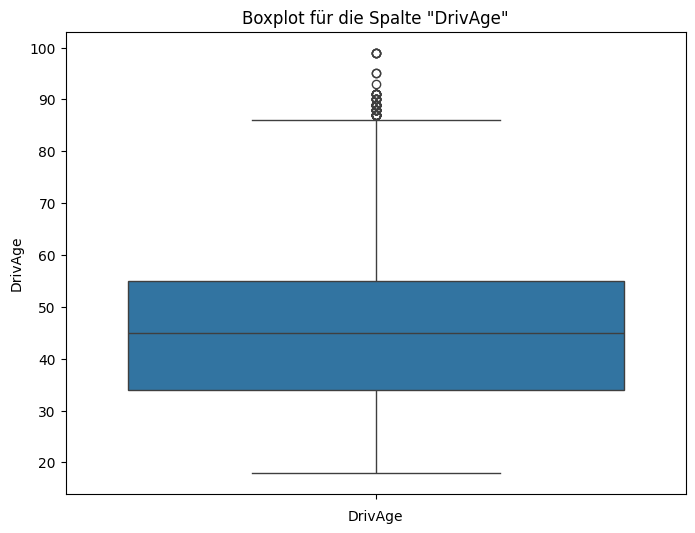

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['DrivAge'])
plt.title('Boxplot für die Spalte "DrivAge"')
plt.xlabel('DrivAge')
plt.show()


<Axes: xlabel='VehGas'>

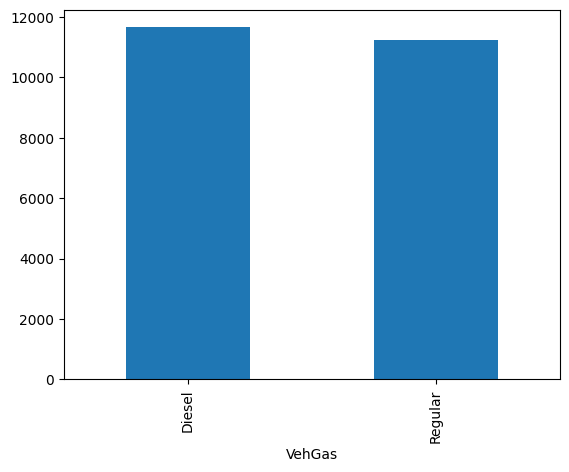

In [36]:
data['VehGas'].value_counts().plot(kind='bar')

<Axes: xlabel='Region'>

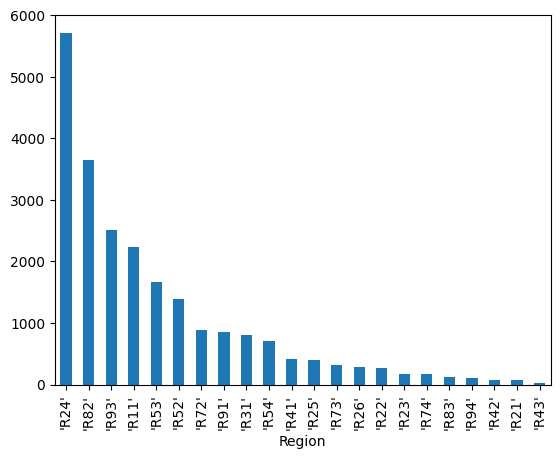

In [37]:
data['Region'].value_counts().plot(kind='bar')

array([[<Axes: title={'center': 'Density'}>]], dtype=object)

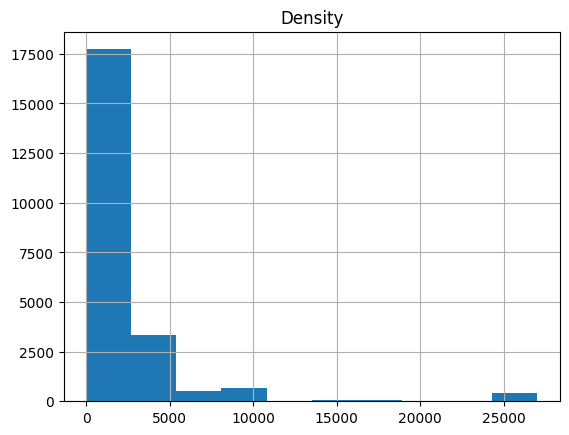

In [38]:
data.hist(column=["Density"])

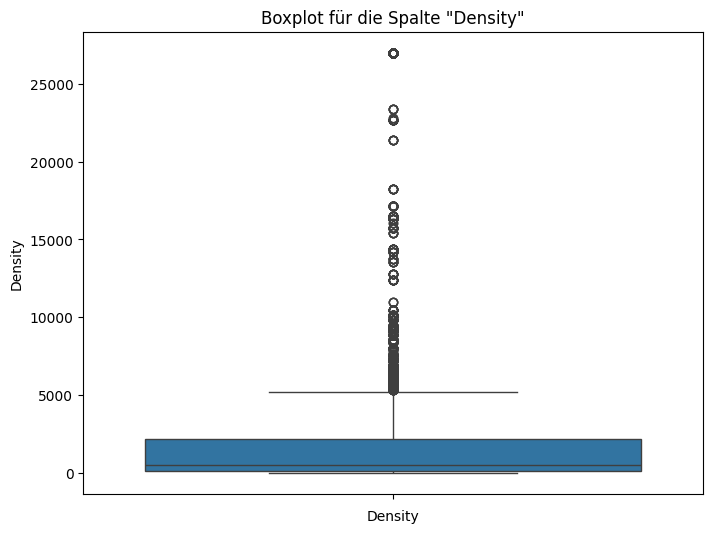

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['Density'])
plt.title('Boxplot für die Spalte "Density"')
plt.xlabel('Density')
plt.show()


### Teil 2: Analyse von freMTPL2sev.arff

array([[<Axes: title={'center': 'ClaimAmount'}>]], dtype=object)

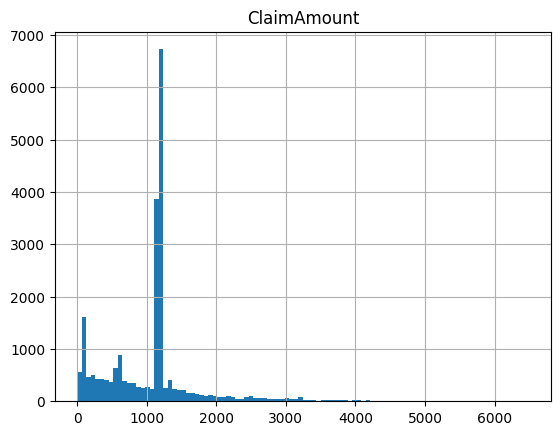

In [40]:
data.hist(column=["ClaimAmount"], bins=100)

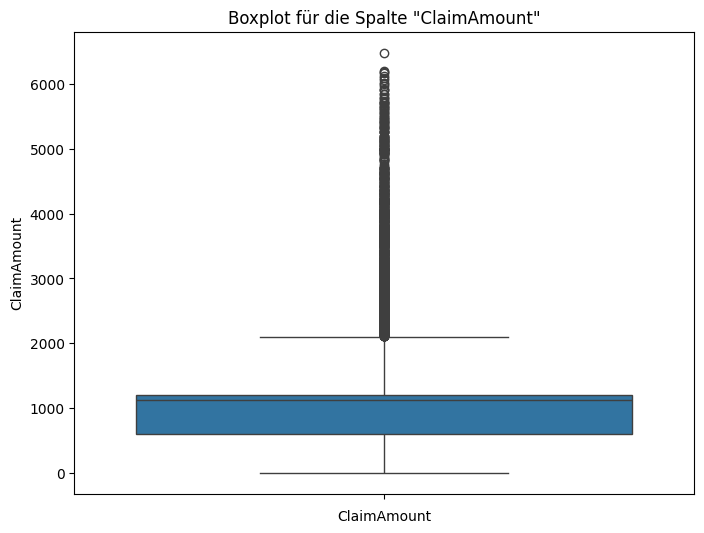

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['ClaimAmount'])
plt.title('Boxplot für die Spalte "ClaimAmount"')
plt.xlabel('ClaimAmount')
plt.show()


## Data Transformation 
### Mapping:

In [42]:
Area_mapping = { "'A'": 0, "'B'": 1, "'C'": 2, "'D'": 3 , "'E'": 4, "'F'": 5}
data['Area'] = data['Area'].map(Area_mapping)

VehBrand_mapping = { "'B1'": 0, "'B2'": 1, "'B3'": 2, "'B4'": 3, "'B5'": 4, "'B6'": 5, "'B10'": 6, "'B11'": 7, "'B12'": 8, "'B13'": 9, "'B14'": 10}
data['VehBrand'] = data['VehBrand'].map(VehBrand_mapping)

VehGas_mapping = { 'Regular': 0, 'Diesel': 1}
data['VehGas'] = data['VehGas'].map(VehGas_mapping)

Region_mapping = { "'R11'": 0, "'R21'": 1, "'R22'": 2, "'R23'": 3, "'R24'": 4, "'R25'": 5, "'R26'": 6, "'R31'": 7, "'R41'": 8, "'R42'": 9,
                 "'R43'": 10, "'R52'": 11, "'R53'": 12, "'R54'": 13, "'R72'": 14, "'R73'": 15, "'R74'": 16, "'R82'": 17, "'R83'": 18,
                 "'R91'": 19, "'R93'": 20, "'R94'": 21}
data['Region'] = data['Region'].map(Region_mapping)

In [43]:
data

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount,ClaimAmountPerYear
0,139.0,1.0,0.75,5,7.0,1.0,61.0,50.0,8,0,27000.0,0,303.00,404.000000
3,424.0,2.0,0.62,5,10.0,0.0,51.0,100.0,8,0,27000.0,0,989.64,1596.193548
6,606.0,1.0,0.84,3,10.0,6.0,54.0,50.0,8,1,583.0,20,1840.14,2190.642857
7,622.0,1.0,0.75,3,5.0,0.0,34.0,64.0,8,0,1565.0,7,1397.97,1863.960000
8,811.0,1.0,0.76,4,5.0,0.0,44.0,50.0,8,0,3317.0,20,971.98,1278.921053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26427,6112437.0,1.0,0.42,2,7.0,1.0,72.0,50.0,8,1,123.0,14,1452.00,3457.142857
26428,6112457.0,1.0,0.36,4,7.0,1.0,53.0,50.0,8,1,4540.0,7,1324.40,3678.888889
26430,6112760.0,1.0,0.26,2,13.0,0.0,48.0,50.0,8,0,171.0,6,1412.40,5432.307692
26431,6112797.0,1.0,0.35,4,6.0,8.0,28.0,60.0,1,1,2252.0,17,576.53,1647.228571


## Ideen für Feature Engineering:

    DrivAge x BonusMalus: Interaktion zwischen Alter und Schadenfreiheitsrabatt
    VehAge x BonusMalus: Interaktion zwischen Fahrzeugalter und Schadenfreiheitsrabatt
    Density x Region: Interaktion zwischen Bevölkerungsdichte und Region
    VehPower x Area: Interaktion zwischen Fahrzeugleistung und Wohnort
    ClaimNb / Exposure: Schadenhäufigkeit pro Jahr


In [44]:
# Feature Engineering:
data['BonusMalusInRegion'] = data['BonusMalus'] * data['Region'] # Dies könnte zeigen, ob bestimmte Regionen eine höhere oder niedrigere Schadenhäufigkeit aufweisen, abhängig von der Schadenfreiheitsklasse.
data['DrivAgexBonusMalus'] = data['DrivAge'] * data['BonusMalus']
data['VehAgexBonusMalus'] = data['VehAge'] * data['BonusMalus']
data['DensityxRegion'] = data['Density'] * data['Region']
data['VehPowerxArea'] = data['VehPower'] * data['Area']
data['VehPowerPerDensity'] = data['VehPower'] / data['Density'] 
# Teilen Sie die Leistung des Fahrzeugs durch die Bevölkerungsdichte des Wohnorts des Versicherungsnehmers. 
# Dies könnte anzeigen, ob Fahrzeuge in dichter besiedelten Gebieten tendenziell mehr Schäden verursachen.


array([[<Axes: title={'center': 'BonusMalusInRegion'}>]], dtype=object)

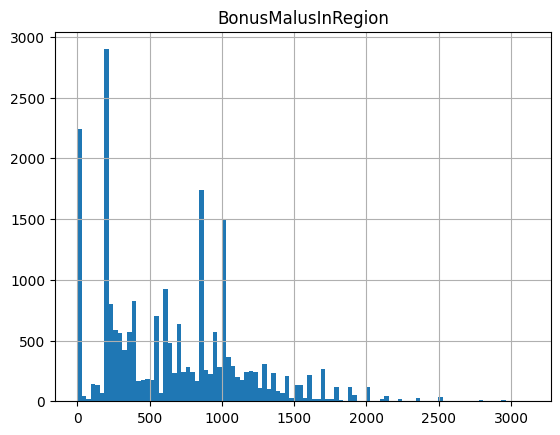

In [45]:
data.hist(column=["BonusMalusInRegion"], bins=100)

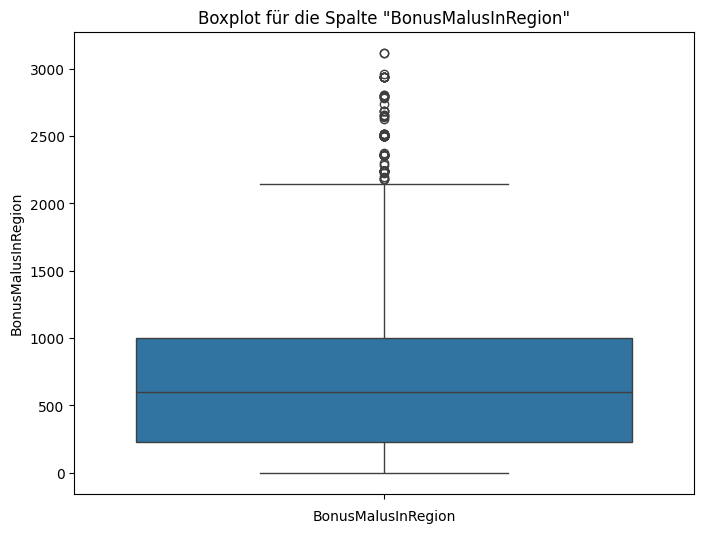

In [46]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['BonusMalusInRegion'])
plt.title('Boxplot für die Spalte "BonusMalusInRegion"')
plt.xlabel('BonusMalusInRegion')
plt.show()

In [47]:
data.describe()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount,ClaimAmountPerYear,BonusMalusInRegion,DrivAgexBonusMalus,VehAgexBonusMalus,DensityxRegion,VehPowerxArea,VehPowerPerDensity
count,2.288800e+04,22888.000000,22888.000000,22888.000000,22888.000000,22888.000000,22888.000000,22888.000000,22888.000000,22888.000000,22888.000000,22888.000000,22888.000000,22888.000000,22888.000000,22888.000000,22888.000000,22888.000000,22888.000000,22888.000000
mean,2.258444e+06,1.125786,0.754407,2.427080,6.466970,7.361762,45.556536,64.873296,2.879893,0.509394,2004.131510,10.271146,1078.747155,1680.674754,659.069119,2821.828338,490.783729,15684.955348,15.741611,0.060555
std,1.578652e+06,0.502750,0.270131,1.364274,2.014313,5.160908,14.686733,20.059945,3.038637,0.499923,4171.950089,6.759503,752.179047,1311.360668,488.627133,978.816551,409.330287,29707.378685,10.673521,0.145211
min,1.390000e+02,1.000000,0.010000,0.000000,4.000000,0.000000,18.000000,50.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,900.000000,0.000000,0.000000,0.000000,0.000148
25%,1.081879e+06,1.000000,0.520000,2.000000,5.000000,3.000000,34.000000,50.000000,0.000000,0.000000,112.000000,4.000000,602.000000,916.705000,228.000000,2185.000000,176.000000,400.000000,8.000000,0.002915
50%,2.122572e+06,1.000000,0.850000,2.000000,6.000000,7.000000,45.000000,55.000000,1.000000,1.000000,498.500000,11.000000,1128.120000,1220.833333,600.000000,2600.000000,400.000000,2964.000000,15.000000,0.012346
75%,3.176835e+06,1.000000,1.000000,4.000000,7.000000,11.000000,55.000000,76.000000,5.000000,1.000000,2163.000000,17.000000,1204.000000,2211.320755,1000.000000,3230.000000,700.000000,15028.250000,21.000000,0.055274
max,6.113182e+06,16.000000,2.000000,5.000000,15.000000,99.000000,99.000000,228.000000,10.000000,1.000000,27000.000000,21.000000,6485.380000,6233.466667,3120.000000,14532.000000,9912.000000,158219.000000,75.000000,6.000000


In [48]:
data.median()

IDpol                 2.122572e+06
ClaimNb               1.000000e+00
Exposure              8.500000e-01
Area                  2.000000e+00
VehPower              6.000000e+00
VehAge                7.000000e+00
DrivAge               4.500000e+01
BonusMalus            5.500000e+01
VehBrand              1.000000e+00
VehGas                1.000000e+00
Density               4.985000e+02
Region                1.100000e+01
ClaimAmount           1.128120e+03
ClaimAmountPerYear    1.220833e+03
BonusMalusInRegion    6.000000e+02
DrivAgexBonusMalus    2.600000e+03
VehAgexBonusMalus     4.000000e+02
DensityxRegion        2.964000e+03
VehPowerxArea         1.500000e+01
VehPowerPerDensity    1.234568e-02
dtype: float64

In [49]:
data.drop(columns=['IDpol', 'ClaimAmount', 'Exposure', 'ClaimNb'], inplace=True) # diese Features sind in der abhängigen Variablen enthalten oder unwesentlich

## Feature Selection anhand Korrelationen

In [50]:
correlation_matrix = data.corr()
correlation_matrix

,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmountPerYear,BonusMalusInRegion,DrivAgexBonusMalus,VehAgexBonusMalus,DensityxRegion,VehPowerxArea,VehPowerPerDensity
Area,1.000000,0.016653,-0.070553,-0.039876,0.091716,0.124106,-0.136282,0.592126,0.091342,0.045020,0.111200,0.047090,-0.020804,0.491848,0.837898,-0.575807
VehPower,0.016653,1.000000,-0.017121,0.021492,-0.065772,0.257732,0.025886,0.048268,0.015827,0.013176,-0.015938,-0.021163,-0.028072,0.007398,0.492815,0.130450
VehAge,-0.070553,-0.017121,1.000000,-0.068613,0.127527,-0.279582,-0.114730,-0.078257,-0.035961,-0.034822,0.020100,0.029351,0.880026,-0.010257,-0.068848,0.035131
DrivAge,-0.039876,0.021492,-0.068613,1.000000,-0.453406,0.036682,-0.057972,0.004316,0.025884,-0.060648,-0.155884,0.626615,-0.238963,0.005193,-0.018840,0.038335
BonusMalus,0.091716,-0.065772,0.127527,-0.453406,1.000000,-0.068121,-0.040884,0.053818,-0.053500,0.092938,0.355315,0.356952,0.506809,0.037552,0.042016,-0.056065
VehBrand,0.124106,0.257732,-0.279582,0.036682,-0.068121,1.000000,-0.009655,0.125374,0.045971,0.091844,0.006037,-0.009730,-0.249852,0.018628,0.221462,-0.011926
VehGas,-0.136282,0.025886,-0.114730,-0.057972,-0.040884,-0.009655,1.000000,-0.112308,-0.003223,0.002293,-0.019922,-0.072792,-0.113771,-0.065739,-0.104717,0.093003
Density,0.592126,0.048268,-0.078257,0.004316,0.053818,0.125374,-0.112308,1.000000,-0.173756,0.022784,-0.137826,0.062133,-0.048273,0.292747,0.532269,-0.189659
Region,0.091342,0.015827,-0.035961,0.025884,-0.053500,0.045971,-0.003223,-0.173756,1.000000,0.022388,0.873992,-0.011659,-0.049993,0.465627,0.069638,-0.089017
ClaimAmountPerYear,0.045020,0.013176,-0.034822,-0.060648,0.092938,0.091844,0.002293,0.022784,0.022388,1.000000,0.052531,0.005103,0.013544,0.012159,0.041137,-0.014680


In [51]:
# Extrahieren der oberen rechten Dreiecksmatrix, da die Korrelationsmatrix symmetrisch ist
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))

# Bestimmen der Features mit den höchsten Korrelationen
n_largest_correlations = upper_triangle.stack().nlargest(5)

print("Features mit den höchsten Korrelationen:")
print(n_largest_correlations)


Features mit den höchsten Korrelationen:
VehAge   VehAgexBonusMalus     0.880026
Region   BonusMalusInRegion    0.873992
Area     VehPowerxArea         0.837898
DrivAge  DrivAgexBonusMalus    0.626615
Area     Density               0.592126
dtype: float64


/tmp/ipykernel_13923/1503842927.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))


### Features, die behalten werden: VehAgexBonusMalus, BonusMalusInRegion, Area

In [53]:
data_ = data.copy()

In [54]:
from sklearn.preprocessing import StandardScaler

# Auswahl der Features, die standardisiert werden sollen
features_to_standardize = ['VehPower', 'VehBrand', 'Area', 'VehGas', 'VehPowerxArea', 'BonusMalusInRegion']

# Erstellen des StandardScaler-Objekts
scaler = StandardScaler()

# Anwenden der Standardisierung auf die ausgewählten Features
data_[features_to_standardize] = scaler.fit_transform(data_[features_to_standardize])


In [55]:
from sklearn.preprocessing import MinMaxScaler

# Auswahl der Features, die normalisiert werden sollen
features_to_normalize = ['VehAge', 'DrivAge', 
        'BonusMalus', 'Density', 'Region', 
        'VehPowerPerDensity', 'DensityxRegion', 'DrivAgexBonusMalus', 'VehAgexBonusMalus']
        #'ClaimNb', 'ClaimAmount', 'ClaimNbPerYear', 'ClaimAmountPerYear',

# Erstellen des MinMaxScaler-Objekts
scaler = MinMaxScaler()

# Anwenden der Normalisierung auf die ausgewählten Features
data_[features_to_normalize] = scaler.fit_transform(data_[features_to_normalize])

## Huber Regressor

In [58]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score, mean_absolute_error
#from sklearn.preprocessing import RobustScaler

#scaler = RobustScaler()

# Definition der relevanten unabhängigen Variablen und der abhängigen Variable
features = data.drop(columns=['ClaimAmountPerYear', 'VehAge', 'Region', 'VehPowerxArea']).columns.tolist()
target = 'ClaimAmountPerYear'

#data_[features] = scaler.fit_transform(data_[features])

# Aufteilung der Daten in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(data_[features], data_[target], test_size=0.2, random_state=42)

# Definition des Modells
huber_regressor = HuberRegressor(max_iter=1000)

# Definition des Grids von Hyperparametern, die Sie durchsuchen möchten
param_grid = {
    'epsilon': [1, 1.5, 2],
    'alpha': [0.0001, 0.00001, 0.000001],
    'tol': [0.01, 0.001, 0.0001, 0.00001]
}

# GridSearchCV initialisieren und anpassen
grid_search = GridSearchCV(estimator=huber_regressor, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Beste Hyperparameter anzeigen
print("Beste Hyperparameter:", grid_search.best_params_)

# Vorhersagen auf den Testdaten mit dem besten Modell machen
y_pred = grid_search.best_estimator_.predict(X_test)

# Bewertung des Modells
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

medae = median_absolute_error(y_test, y_pred)
print("Median Absolute Error:", medae)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


Beste Hyperparameter: {'alpha': 1e-06, 'epsilon': 2, 'tol': 0.01}
Mean Squared Error: 1725117.9354427033
Mean Absolute Error: 948.7880938697625
Median Absolute Error: 674.5549569912978
R2 Score: 0.009218621193288867


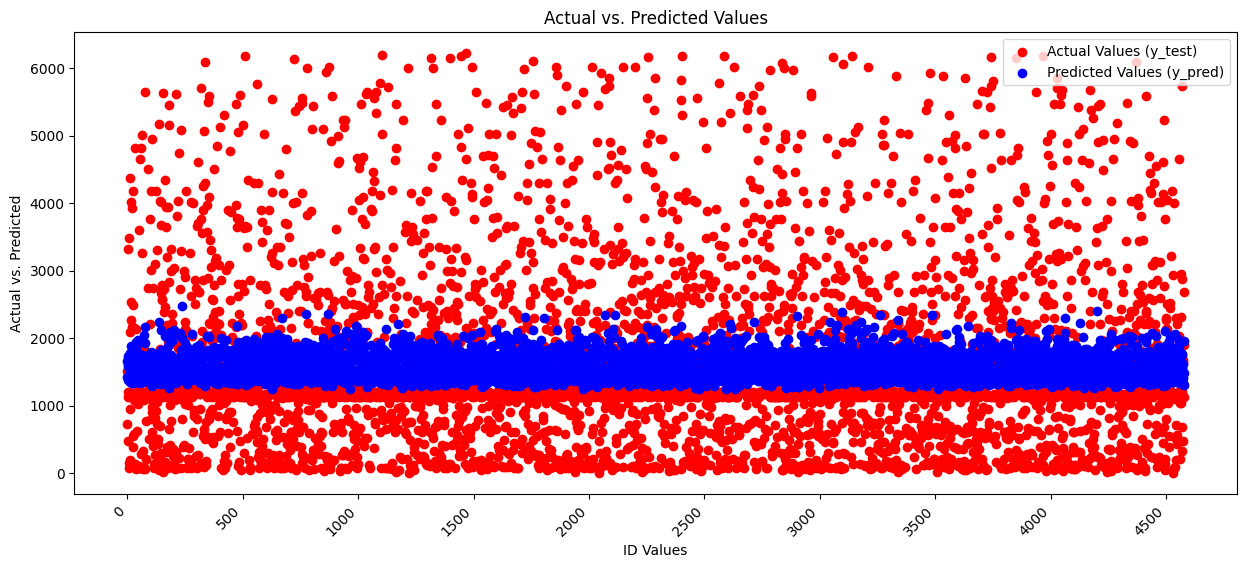

In [59]:
ID = np.arange(start=0, stop=len(y_test), step=1)

fig, ax = plt.subplots(figsize=(15, 6))  # Increase figure size for wider x-axis


# Scatter plot y_test and y_pred with ID values on x-axis
ax.scatter(ID, y_test, color='red', label='Actual Values (y_test)')
ax.scatter(ID, y_pred, color='blue', label='Predicted Values (y_pred)')

# Set labels and title
ax.set_xlabel('ID Values')
ax.set_ylabel('Actual vs. Predicted')
ax.set_title('Actual vs. Predicted Values')

# Add legend
ax.legend()

ax.set_xticks(ID[::500])  # Set ticks every 500th value
ax.set_xticklabels(ID[::500], rotation=45, ha='right')  # Rotate and align labels

# Show the plot
plt.show()

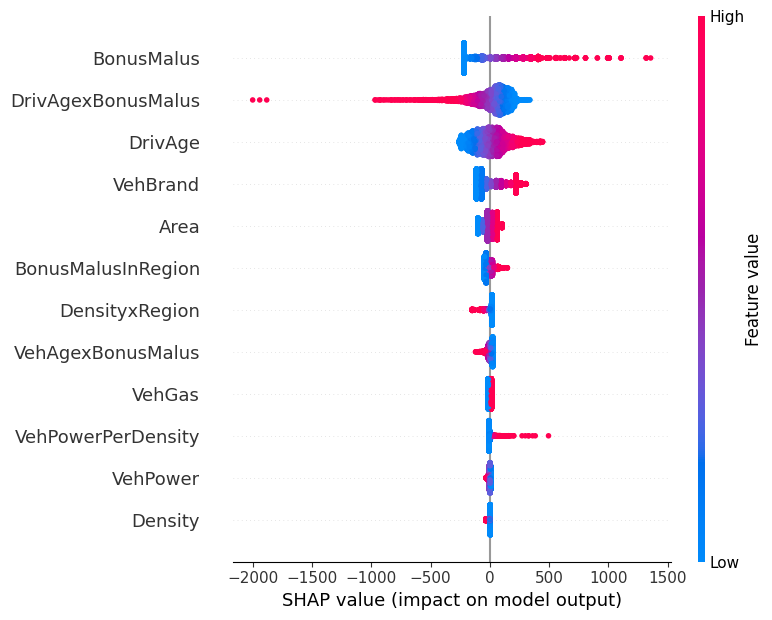

In [60]:
import shap

# Berechnung der SHAP-Werte für das Modell
explainer = shap.Explainer(grid_search.best_estimator_, X_train)
shap_values = explainer.shap_values(X_test)

# Anzeigen des SHAP Summary Plots
shap.summary_plot(shap_values, X_test, feature_names=features)


## HistGradientBoostingRegressor

In [61]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score, mean_absolute_error
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# Definition der relevanten unabhängigen Variablen und der abhängigen Variable
features = data.drop(columns=['ClaimAmountPerYear', 'VehAge', 'Region', 'VehPowerxArea']).columns.tolist()
#features = ['DensityxRegion', 'DrivAge', 'BonusMalus', 'DrivAgexBonusMalus']
target = 'ClaimAmountPerYear'

data_[features] = scaler.fit_transform(data_[features])

# Aufteilung der Daten in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(data_[features], data_[target], test_size=0.2, random_state=42)

# Definition des Modells
gb_regressor = HistGradientBoostingRegressor(random_state=42, max_iter=500, n_iter_no_change=20, loss='absolute_error')

# Definition des Grids von Hyperparametern, die Sie durchsuchen möchten
param_grid = {
    'min_samples_leaf': [1, 2, 4],  # Minimale Anzahl von Beispielen in einem Blattknoten
    'learning_rate': [0.01, 0.1, 0.001, 0.0005],
    'max_depth': [4, 9],
    'l2_regularization': [0.1, 0.2]
}

# GridSearchCV initialisieren und anpassen
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Beste Hyperparameter anzeigen
print("Beste Hyperparameter:", grid_search.best_params_)

# Vorhersagen auf den Testdaten mit dem besten Modell machen
y_pred = grid_search.best_estimator_.predict(X_test)

# Bewertung des Modells
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

medae = median_absolute_error(y_test, y_pred)
print("Median Absolute Error:", medae)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


Beste Hyperparameter: {'l2_regularization': 0.1, 'learning_rate': 0.1, 'max_depth': 9, 'min_samples_leaf': 4}
Mean Squared Error: 1822231.5191131558
Mean Absolute Error: 897.6214314837003
Median Absolute Error: 603.2074649101676
R2 Score: -0.046556307785801554


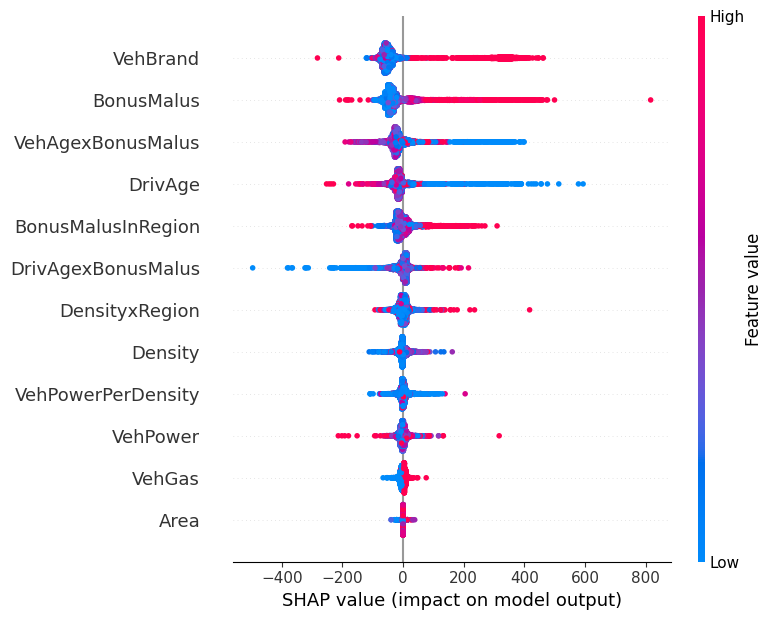

In [62]:
import shap

# Berechnen der SHAP-Werte
explainer = shap.Explainer(grid_search.best_estimator_)
shap_values = explainer.shap_values(X_test)

# Plot der SHAP-Summenplots
shap.summary_plot(shap_values, X_test)


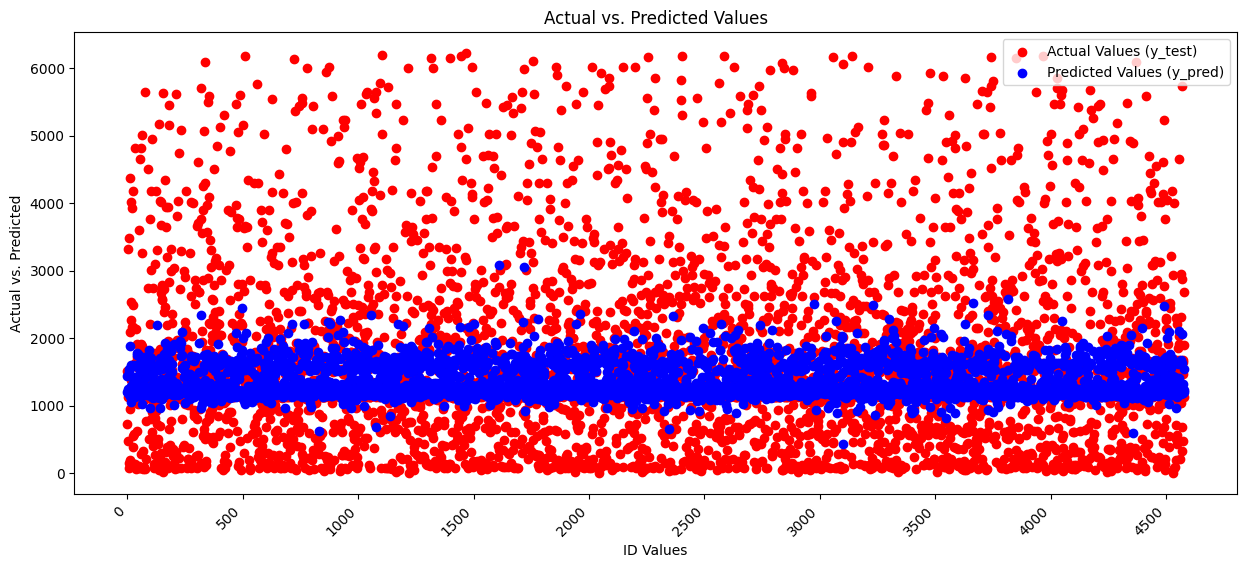

In [63]:
ID = np.arange(start=0, stop=len(y_test), step=1)

fig, ax = plt.subplots(figsize=(15, 6))  # Increase figure size for wider x-axis


# Scatter plot y_test and y_pred with ID values on x-axis
ax.scatter(ID, y_test, color='red', label='Actual Values (y_test)')
ax.scatter(ID, y_pred, color='blue', label='Predicted Values (y_pred)')

# Set labels and title
ax.set_xlabel('ID Values')
ax.set_ylabel('Actual vs. Predicted')
ax.set_title('Actual vs. Predicted Values')

# Add legend
ax.legend()

ax.set_xticks(ID[::500])  # Set ticks every 500th value
ax.set_xticklabels(ID[::500], rotation=45, ha='right')  # Rotate and align labels

# Show the plot
plt.show()